
# ASSIGNED PFR with equilibrium

The following liquid-phase reaction: $A \leftrightharpoons B + C$ occurs in a plug flow reactor. If the equilibrium constant is known to be 2198 (dimensionless). What is the equilibrium composition if you start with pure $A$ at a concentration of 2M? Comment on whether your solution makes sense.




# Solution

We need to setup an equation to solve that looks like:

$0 = K - C_{B,eq} C_{C,eq} / C_{A,eq} $

The equilibrium concentrations by defining the conversion on species A.

$C_A = C_{A0}(1 - X)$

$C_B = C_C = C_{A0} X$

The equilibrium constant is large, so it helps to plot your function to get a good initial guess. Otherwise, your solution tends to fail.



Equil. composition: Ca=0.001817 M, Cb=1.998 M, Cc=1.998 M
2198.0

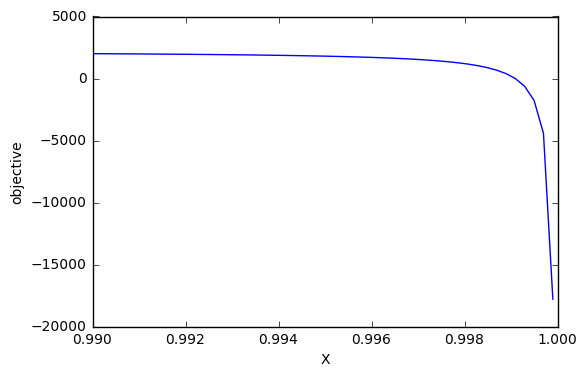

In [1]:
from scipy.optimize import fsolve

K = 2198.0
Ca0 = 2.0

def objective(X):
    Caeq = Ca0 * (1 - X)
    Cbeq = Ca0 * X
    Cceq = Ca0 * X
    return K  - Cceq * Cbeq / Caeq

import matplotlib.pyplot as plt
import numpy as np

# we need to make a good guess for a solution. We plot the objective
# function to get an idea.
X = np.linspace(0.99, 0.9999)
plt.plot(X, objective(X))
plt.xlabel('X')
plt.ylabel('objective')

# To get an initial guess. The solution (f(x) = 0) is near 1.999
xeq, = fsolve(objective, 0.999)

Caeq = Ca0 * (1 - xeq)
Cbeq = Cceq = Ca0 * xeq

print('Equil. composition: Ca={:1.4g} M, Cb={:1.4g} M, Cc={:1.4g} M'.format(Caeq, Cbeq, Cceq))
print(Cceq * Cbeq / Caeq)   # check for good answer, it should be 2198

This answer does make sense because the equilibrium constant is so large. We expect mostly products to be there, and hardly any reactants (but more than zero).

Note that the equilibrium constant is given in dimensionless form, but in our objective function we use $K - Cceq * Cbeq / Caeq$. The second term has units of concentration, and is not dimensionless. We were not precise in expressing that as: $K - Cceq/C0 * Cbeq/C0 / (Caeq/C0$ which is correct. Here, C0 is implicitly 1M. If you convert your concentrations to anything else, you have to apply a conversion factor to get the right answer.

